In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [35]:
class KMeansClustering(object):
    
    def __init__(self, k):
        self.k = k
        self.centers = None
        self.clusters = None

    def plot_state(self, X):
        plt.scatter(X[:, 0], X[:, 1], c=self.clusters)
        plt.scatter(self.centers[:, 0], self.centers[:, 1], c='r', s=70)
        plt.grid()            
        
    def fit(self, X, runs=10, plot=False, plot_final=True, num_iter=100, plot_freq=0.1):
        best_var = 10**9
        for _ in range(runs):
            fail = False
            centers = np.random.randn(self.k, X.shape[1]) * 3
            for iter_ in range(num_iter):  
                arr = np.zeros((X.shape[0], self.k))
                for i, center in enumerate(centers, 0):
                    arr[:, i] = (((X - center) ** 2).sum(axis=1) ** 0.5)
                self.clusters = np.argmin(arr, axis=1)

                if plot and iter_ % int(num_iter * plot_freq) == 0:
                    self.plot_state(X)
                    plt.title("Iteration " + str(iter_))
                    plt.show()              

                for cno in range(self.k):
                    try:
                        centers[cno] = X[self.clusters == cno, :].mean(axis=0)
                    except:
                        fail = True
                        break
            if fail:
                continue

            var = 0
            for center in centers:
                var += np.mean(((X - center) ** 2)) ** 0.5
            if var < best_var:
                best_var = var
                self.centers = centers
        
        if plot_final and not fail:
            self.plot_state(X)
            plt.title("Iteration " + str(iter_ + 1))
            plt.show()  

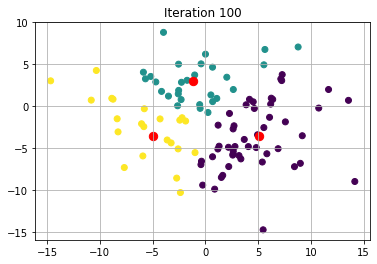

In [36]:
#X, y = (make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=4))

model = KMeansClustering(3)
model.fit(X)

In [40]:
data = pd.DataFrame(X)
data.to_csv('manim_test_data.csv', index=False)

In [273]:
df = pd.read_csv('USArrests.csv')

c:\users\siddh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.


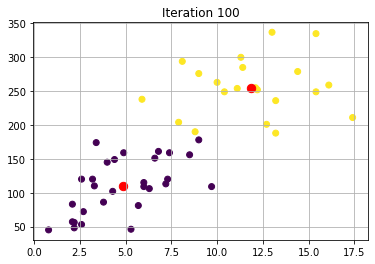

In [308]:
model = KMeansClustering(2)
model.fit(df.values[:, 1:4])

In [11]:
print(X.min(axis=0))
print(X.max(axis=0))

[-12.70255744 -15.5793665 ]
[12.14921449  9.49434713]
